Created by: Joel Nail & Alex Yu

# <p style="text-align: center;">MIS 284N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 3 - Machine Learning using Tensorflow and Google Colab</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Saturday, October 15th submitted via Canvas by 11:59 pm</p>

This will be a in-class project done in teams of 2. 

In this Project, we will work with CIFAR10 image dataset. 
The starter code to download the database using keras is given below. 
Test the project on Google Colab running on a CPU, GPU and TPU
 

# In every line of code, please write a comment to briefly explain what that line is doing.
Your grades will be based on your understanding of the code you write! 


# Task 1
Convert the features in a form that can be given as input to tensorflow library/functions

In this task you will perform data augmentation. That is, pre-process the data to make the model more robust. Experiment with data augmentation techniques like rotation, translation, horizontal-flip, scaling, ZCA whitening and histogram equalization. 
You can choose any two or more augmentation technique(s) of your choice. 

In [1]:
# importing necessary libraries
import tensorflow as tf
import numpy as np

import distutils
if distutils.version.LooseVersion(tf.__version__) < '1.14':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')


In [4]:
from keras.datasets import cifar10 # importing the cifar10 dataset
import matplotlib.pyplot as plt # importing pyplot in order to display images and graphs
import random # importing random in order to display random images
%matplotlib inline # ensure that images and plots stay in the notebook

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # loading our train and test sets

170498071/170498071 [==============================] - 3s 0us/step


**Just a little test to see what the images look like**

6


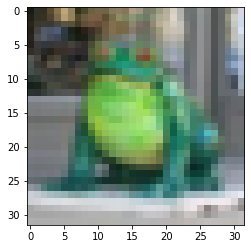

In [ ]:
# selecting a random value between 0 and 100
val = random.randint(0,100)
# selecting a random image from the dataset to display
image0 = x_train[val]
# printing the shape of the image
# print(image0.shape) 

plt.imshow(image0) # displaying the image
print(int(y_train[val])) # printing the label of the image

**Performing data augmentation**

In [ ]:
# Big shoutout to Moritz Hambach's CIFAR GitHub project which provided me with 
# the inspiration for the following augmentation code
from keras.preprocessing.image import ImageDataGenerator

# aug1: horizontal flip=True, rotation range=10
# aug2: horizontal flip=True, rotation range=25
# aug3: horizontal_flip=True, rotation_range=25, zca_whitening=True - NO GOOD

# the below code defines ImageDataGenerator objects which will be used to augment our data
# I have decided to implement several augmentation configurations to test multiple augmentation combinations

dataAug1 = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10
)

# this was the best set of augmentations from my experiments
# this image data generator will randomly apply the below augmentations to our dataset
dataAug2 = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# going all out here - didn't get great results from it
dataAug3 = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=25,
    #zca_whitening=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

dataAug2.fit(x_train) # fitting the model to our training set

**Visualizing the transformations**

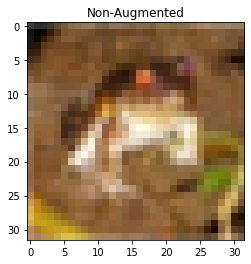

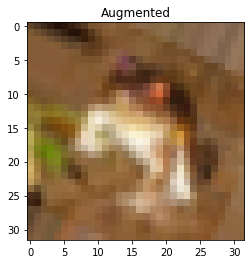

In [ ]:
# displaying the first image in the training set before augmentation
image0 = x_train[0] # grabbing first image
plt.imshow(image0) # displaying image
plt.title("Non-Augmented") # giving the image a title
plt.show() # ensuring the image shows

# displaying the first image in the training set after augmentation
# i'm not sure why I had to put this in a for loop to get it to work
# i think it is because the .flow method returns an iterator, but i'm not sure
# turning shuffle to False so that we get the first image from the set
for x_demo, y_demo in dataAug2.flow(x_train, y_train, batch_size=3, shuffle=False):
  for i in range(0, 1):
    plt.imshow(x_demo[i].astype(np.uint8)) # displaying the augmented image
    plt.title("Augmented") # giving the plot a title
  plt.show() # ensuring the image shows
  break # becase we only want to display the first image

# Task 2
Build a Neural Network model, train on the features and report the accuracy.
Report your observations on the time taken on CPU and GPU (with and without CuDNN kernel) 



1.   Create a CNN based model with 4 hidden layers with 64, 128, 256 and 512 units in each succesive layer. Use a 5x5 convolution kernel and change as necessary. (Use at least 2 augmentations on your input) 
2.   Create an LSTM based model with 1 LSTM layer with 256 units. 



**Defining Function to Create Model**

In [ ]:
# code to create model modified from Dr Y's FashionMNIST notebook
def create_model():
  model = tf.keras.models.Sequential() # we will be creating a sequential model with four layers
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:])) # normalizing the inputs for the first layer
  model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu')) # 2D convolution layer with 64 filters, a 5x5 kernel, padding, and ELU activation function
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # performing max pooling to reduce number of features and prevent over-fitting
  model.add(tf.keras.layers.Dropout(0.25)) # randomly setting inputs to 0 in effort to prevent overfitting

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:])) # normalizing the inputs for the second layer
  model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu')) # 2D convolution layer with 128 filters, a 5x5 kernel, padding, and ELU activation function
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # performing max pooling to reduce number of features and prevent over-fitting
  model.add(tf.keras.layers.Dropout(0.25)) # randomly setting inputs to 0 in effort to prevent overfitting

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:])) # normalizing the inputs for the third layer
  model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu')) # 2D convolution layer with 256 filters, a 5x5 kernel, padding, and ELU activation function
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # performing max pooling to reduce number of features and prevent over-fitting
  model.add(tf.keras.layers.Dropout(0.25)) # randomly setting inputs to 0 in effort to prevent overfitting

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:])) # normalizing the inputs for the fourth layer
  model.add(tf.keras.layers.Conv2D(512, (5, 5), padding='same', activation='elu')) # 2D convolution layer with 512 filters, a 5x5 kernel, padding, and ELU activation function
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # performing max pooling to reduce number of features and prevent over-fitting
  model.add(tf.keras.layers.Dropout(0.25)) # randomly setting inputs to 0 in effort to prevent overfitting

  model.add(tf.keras.layers.Flatten()) # flattening input
  model.add(tf.keras.layers.Dense(512)) # creating a densely connected layer with 512 units
  model.add(tf.keras.layers.Activation('elu')) # using ELU activation function
  model.add(tf.keras.layers.Dropout(0.5)) # randomly setting inputs to 0 in effort to prevent overfitting
  model.add(tf.keras.layers.Dense(10)) # creating densely connected layer with 10 units (number of classes)
  model.add(tf.keras.layers.Activation('softmax')) # using softmax activation function
  return model

**CNN Using CPU**

In [ ]:
modelAug = create_model() # creating model to train on augmented data

# compiling model with adam optimizer and sparse categorical crossentropy/accuracy as our evaluation metrics
# learning rate of .001 is large enough that it doesn't take too long to run on CPU
modelAug.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

In [ ]:
%%time

batch = 128 # chose batch size more or less randomly - seems to give good performance

# steps per epoch was calculated as len(x_train)/batch_size

# training model on augmented data with a batch size of 128 and 10 epochs with 391 steps per epoch
historyAug = modelAug.fit(
    dataAug2.flow(x_train, y_train, batch_size=batch), # this is where we perform our augmentation
    epochs=10,
    steps_per_epoch=391,
    validation_data=(x_test.astype(np.float32), y_test.astype(np.float32)), # we'll use the test set to perform validation
    validation_freq=1, # we want to validate using the test set on each epoch
    batch_size = batch
)

# evaluating training set accuracy
aug_train_acc = modelAug.evaluate(x_train.astype(np.float32), y_train.astype(np.float32), batch_size=batch)
print(aug_train_acc)

# evalutating test set accuracy
aug_test_acc = modelAug.evaluate(x_test.astype(np.float32), y_test.astype(np.float32), batch_size=batch)
print(aug_test_acc)

Epoch 1/10
391/391 [==============================] - 884s 2s/step - loss: 2.1526 - sparse_categorical_accuracy: 0.3215 - val_loss: 1.4167 - val_sparse_categorical_accuracy: 0.5144
Epoch 2/10
391/391 [==============================] - 835s 2s/step - loss: 1.5067 - sparse_categorical_accuracy: 0.4667 - val_loss: 1.2394 - val_sparse_categorical_accuracy: 0.5875
Epoch 3/10
391/391 [==============================] - 833s 2s/step - loss: 1.2492 - sparse_categorical_accuracy: 0.5573 - val_loss: 1.0584 - val_sparse_categorical_accuracy: 0.6359
Epoch 4/10
391/391 [==============================] - 838s 2s/step - loss: 1.1227 - sparse_categorical_accuracy: 0.6077 - val_loss: 0.9361 - val_sparse_categorical_accuracy: 0.6768
Epoch 5/10
391/391 [==============================] - 812s 2s/step - loss: 1.0384 - sparse_categorical_accuracy: 0.6381 - val_loss: 0.9882 - val_sparse_categorical_accuracy: 0.6710
Epoch 6/10
391/391 [==============================] - 816s 2s/step - loss: 0.9732 - sparse_cate

*Results for CPU-based CNN*

*   Epochs: 10 epochs at 391 steps per epoch
*   Training Set Accuracy: 79.39%
*   Test Set Accuracy: 76.87%
*   Training Speed: ~820 seconds per Epoch
*   Total Time to Run: ~2.5 hours 



**CNN using GPU**

In [ ]:
# runtime was changed to GPU before running the below cells

modelAugGPU = create_model() # creating model to train on augmented data using a GPU

# compiling model with adam optimizer and sparse categorical crossentropy/accuracy as our evaluation metrics
# using a learning rate of .001 so we can have a 1:1 comparison with the CPU trial above
modelAugGPU.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

In [ ]:
%%time

batch = 128 # keeping batch size the same to ensure a 1:1 comparison

# training model on augmented data using GPU with the same hyperparameters as the CPU model to ensure a 1:1 comparison 
history_cudnn = modelAugGPU.fit(
    dataAug2.flow(x_train, y_train, batch_size=batch),
    epochs=10,
    steps_per_epoch=391,
    validation_data=(x_test.astype(np.float32), y_test.astype(np.float32)),
    validation_freq=1,
    batch_size=batch
)

# evaluating training set accuracy
augGPU_train_acc = modelAugGPU.evaluate(x_train.astype(np.float32), y_train.astype(np.float32), batch_size=batch)
print(augGPU_train_acc)

# evalutating test set accuracy
augGPU_test_acc = modelAugGPU.evaluate(x_test.astype(np.float32), y_test.astype(np.float32), batch_size=batch)
print(augGPU_test_acc)

Epoch 1/10
391/391 [==============================] - 35s 66ms/step - loss: 2.1159 - sparse_categorical_accuracy: 0.3319 - val_loss: 1.4195 - val_sparse_categorical_accuracy: 0.4926
Epoch 2/10
391/391 [==============================] - 25s 65ms/step - loss: 1.5170 - sparse_categorical_accuracy: 0.4677 - val_loss: 1.1366 - val_sparse_categorical_accuracy: 0.6083
Epoch 3/10
391/391 [==============================] - 25s 64ms/step - loss: 1.2596 - sparse_categorical_accuracy: 0.5529 - val_loss: 1.0419 - val_sparse_categorical_accuracy: 0.6388
Epoch 4/10
391/391 [==============================] - 25s 64ms/step - loss: 1.1315 - sparse_categorical_accuracy: 0.6047 - val_loss: 0.9046 - val_sparse_categorical_accuracy: 0.6857
Epoch 5/10
391/391 [==============================] - 25s 63ms/step - loss: 1.0455 - sparse_categorical_accuracy: 0.6374 - val_loss: 0.9784 - val_sparse_categorical_accuracy: 0.6747
Epoch 6/10
391/391 [==============================] - 25s 64ms/step - loss: 0.9689 - spars

*Results for GPU-based CNN*



*   Epochs: 10 epochs at 391 steps per epoch
*   Training Set Accuracy: 79.87%
*   Test Set Accuracy: 76.25%
*   Training Speed: ~25 seconds per Epoch
*   Total Time to Run: ~4.5 minutes

The time difference between CPU and GPU is crazy - GPU's give you the freedom to expirement with so much more

**Taking advantage of the GPU speed to train with several more epochs to maximize accuracy**

In [ ]:
modelAugGPU = create_model() # creating model to train on augmented data using a GPU

# compiling model with adam optimizer and sparse categorical crossentropy/accuracy as our evaluation metrics
modelAugGPU.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=.0001), # decreasing learning rate from .001 to .0001 seemed to improve performance
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

In [ ]:
print(len(x_train)/128) # this will be my steps per epoch (rounded up)

390.625


In [ ]:
%%time

batch = 128

# training model on augmented data with a batch size of 128, 100 epochs, and 391 steps per epoch
# i tried to keep the majority of my hyperparameters the same - only the learning rate and # of epochs were changed
historyAugGPU = modelAugGPU.fit(
    dataAug2.flow(x_train, y_train, batch_size=batch),
    epochs=100,
    steps_per_epoch=391,
    validation_data=(x_test.astype(np.float32), y_test.astype(np.float32)),
    validation_freq=1,
    batch_size=batch
)

# evaluating training set accuracy
augGPU_train_acc = modelAugGPU.evaluate(x_train.astype(np.float32), y_train.astype(np.float32), batch_size=batch)
print(augGPU_train_acc)

# evalutating test set accuracy
augGPU_test_acc = modelAugGPU.evaluate(x_test.astype(np.float32), y_test.astype(np.float32), batch_size=batch)
print(augGPU_test_acc)

Epoch 1/100
391/391 [==============================] - 34s 62ms/step - loss: 1.9879 - sparse_categorical_accuracy: 0.3331 - val_loss: 3.1114 - val_sparse_categorical_accuracy: 0.2419
Epoch 2/100
391/391 [==============================] - 24s 61ms/step - loss: 1.6807 - sparse_categorical_accuracy: 0.4244 - val_loss: 1.9954 - val_sparse_categorical_accuracy: 0.4244
Epoch 3/100
391/391 [==============================] - 24s 61ms/step - loss: 1.5532 - sparse_categorical_accuracy: 0.4641 - val_loss: 1.7351 - val_sparse_categorical_accuracy: 0.4846
Epoch 4/100
391/391 [==============================] - 24s 61ms/step - loss: 1.4445 - sparse_categorical_accuracy: 0.4988 - val_loss: 1.7276 - val_sparse_categorical_accuracy: 0.4984
Epoch 5/100
391/391 [==============================] - 24s 61ms/step - loss: 1.3668 - sparse_categorical_accuracy: 0.5238 - val_loss: 1.3549 - val_sparse_categorical_accuracy: 0.5663
Epoch 6/100
391/391 [==============================] - 24s 61ms/step - loss: 1.3060 -

*GPU-based CNN on Augmented Data Results w/ Smaller Learning Rate and More Epochs*

*   Epochs: 100 epochs at 391 steps per epoch
*   Training Set Accuracy: 95.72%
*   Test Set Accuracy: 86.05%
*   Training Speed: ~23 seconds per Epoch
*   Total Time to Run: ~40 minutes

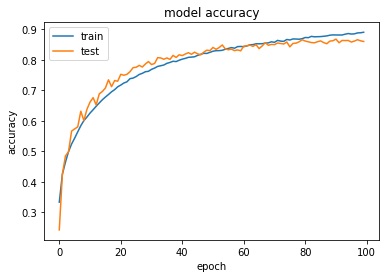

In [ ]:
# plotting function taken from Moritz Hambach's notebook
def plothist(hist):
    plt.plot(hist.history['sparse_categorical_accuracy'])
    plt.plot(hist.history['val_sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plothist(historyAugGPU)

GPUs really allow for a lot more intensive models which is awesome

**Now let's try out an LSTM model**

In [5]:
print(x_train.shape) # just printing this to show the effect of the reshape below
x_train_flat = x_train.reshape(50000, 32, -1) # reshaping training set images to be 2D instead of 3D
print(x_train_flat.shape) # just printing this to show the effect of the reshape

print(x_test.shape) # just printing this to show the effect of the reshape below
x_test_flat = x_test.reshape(10000, 32, -1) # reshaping test set images to be 2D instead of 3D
print(x_test_flat.shape) # just printing this to show the effect of the reshape

(50000, 32, 32, 3)
(50000, 32, 96)
(10000, 32, 32, 3)
(10000, 32, 96)


In [6]:
# the Image Data Generator didn't seem to work well with the LSTM model 
# as such, I'm defining a new augmentation model here which will be applied to our reshaped data
dataAug = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation((.1, .3))
])

x_train_flat_aug = dataAug(x_train_flat) # creating a set of augmented images

In [14]:
# this cell is unecessary - I used it for easy copy and paste into my LSTM models below
# it simply contains code from the past two cells consolidated into one
x_train_flat = x_train.reshape(50000, 32, -1)
x_test_flat = x_test.reshape(10000, 32, -1)

dataAug = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation((.1, .3))
])

x_train_flat_aug = dataAug(x_train_flat)

**LSTM on CPU w/ CUDNN**

In [13]:
# code to create the LSTM model taken from Dr Y's LSTM notebook

batch_size = 256 # using batch size of 256 because it had better performance that batch size of 128
input_dim = 32   # CIFAR images are 32x32 - I ended up hardcoding the input shape because I had issues with this variable

units = 256       # using 256 units as mentioned in Task 2
output_size = 10  # CIFAR labels are from 0 to 9 (10 total)

# defining function to build the LSTM model w/ parameter that defaults to using CuDNN kernel but gives option to turn off
def build_lstm_model(allow_cudnn_kernel=True):
  # CuDNN is only available at the layer level, and not at the cell level.
  # This means `LSTM(units)` will use the CuDNN kernel,
  # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
  if allow_cudnn_kernel:
    # Defining the LSTM layer (using CuDNN kernel)
    lstm_layer = tf.keras.layers.LSTM(units, input_shape=(x_train_flat.shape[1:])) # return_sequence=True caused issues so I removed it
  else:
    # Defining the LSTM layer (not using CuDNN kernel)
    lstm_layer = tf.keras.layers.RNN(
        tf.keras.layers.LSTMCell(units),
        input_shape=(x_train_flat.shape[1:]))
  # here we are defining the model using the lstm layer defined above
  model = tf.keras.models.Sequential([
      lstm_layer,
      tf.keras.layers.BatchNormalization(), # normalizing the inputs
      tf.keras.layers.Dense(256), # adding a layer of 256 densely connected nodes - this seemed to improve performance
      tf.keras.layers.Activation('elu'), # using an elu activation function to remain consistent with CNN model
      tf.keras.layers.Dropout(.25), # setting random weights to zero to prevent overfitting
      tf.keras.layers.Dense(output_size, activation='softmax')] # using output size = 10 since we have that many classes
  )
  return model

In [ ]:
lstm_model = build_lstm_model(allow_cudnn_kernel=True) # building the model with the CuDNN kernel

# compiling the model with sparse categorical crossentropy/accuracy as our metrics
# a smaller learning rate performed better in the LSTM model
lstm_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
              metrics=['sparse_categorical_accuracy'])

In [ ]:
%%time

# fitting the model using the augmented data
lstm_model.fit(x_train_flat_aug, y_train.astype(np.float32),
          validation_data=(x_test_flat.astype(np.float32), y_test.astype(np.float32)),
          batch_size=batch_size, 
          epochs=10)

lstm_model.evaluate(x_test_flat, y_test) # evaluating our performance using the test set

Epoch 1/10
196/196 [==============================] - 66s 321ms/step - loss: 2.3556 - sparse_categorical_accuracy: 0.1979 - val_loss: 2.0383 - val_sparse_categorical_accuracy: 0.2599
Epoch 2/10
196/196 [==============================] - 58s 298ms/step - loss: 2.0811 - sparse_categorical_accuracy: 0.2614 - val_loss: 1.9365 - val_sparse_categorical_accuracy: 0.2975
Epoch 3/10
196/196 [==============================] - 60s 307ms/step - loss: 1.9705 - sparse_categorical_accuracy: 0.2929 - val_loss: 1.8932 - val_sparse_categorical_accuracy: 0.3075
Epoch 4/10
196/196 [==============================] - 59s 303ms/step - loss: 1.9154 - sparse_categorical_accuracy: 0.3101 - val_loss: 1.8702 - val_sparse_categorical_accuracy: 0.3283
Epoch 5/10
196/196 [==============================] - 57s 290ms/step - loss: 1.8853 - sparse_categorical_accuracy: 0.3192 - val_loss: 1.8443 - val_sparse_categorical_accuracy: 0.3313
Epoch 6/10
196/196 [==============================] - 57s 291ms/step - loss: 1.8378 -

[1.7544924020767212, 0.3666999936103821]

*Results for CPU w/ CuDNN:*
* Time to run w/ CuDNN Kernel: ~1 minute per epoch
* Total Time to Run: ~10 minutes
* Test Accuracy: 36.67%

**LSTM on CPU w/o CUDNN** (didn't realize that CuDNN isn't relevant for CPU)

In [ ]:
lstm_model = build_lstm_model(allow_cudnn_kernel=False) # building the model without a CuDNN kernel

# compiling the model with sparse categorical crossentropy/accuracy as our metrics
# a smaller learning rate performed better in the LSTM model
lstm_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
              metrics=['sparse_categorical_accuracy'])

In [ ]:
%%time

# fitting the model with the augmented data
lstm_model.fit(x_train_flat_aug, y_train.astype(np.float32),
          validation_data=(x_test_flat.astype(np.float32), y_test.astype(np.float32)),
          batch_size=batch_size, 
          epochs=10)

lstm_model.evaluate(x_test_flat, y_test) # evaluating model using the test set

Epoch 1/10
196/196 [==============================] - 58s 287ms/step - loss: 2.3313 - sparse_categorical_accuracy: 0.2091 - val_loss: 2.0294 - val_sparse_categorical_accuracy: 0.2630
Epoch 2/10
196/196 [==============================] - 58s 294ms/step - loss: 2.0773 - sparse_categorical_accuracy: 0.2652 - val_loss: 1.9639 - val_sparse_categorical_accuracy: 0.2902
Epoch 3/10
196/196 [==============================] - 59s 302ms/step - loss: 1.9839 - sparse_categorical_accuracy: 0.2922 - val_loss: 1.9039 - val_sparse_categorical_accuracy: 0.3091
Epoch 4/10
196/196 [==============================] - 58s 294ms/step - loss: 1.9100 - sparse_categorical_accuracy: 0.3132 - val_loss: 1.8363 - val_sparse_categorical_accuracy: 0.3365
Epoch 5/10
196/196 [==============================] - 56s 286ms/step - loss: 1.8681 - sparse_categorical_accuracy: 0.3291 - val_loss: 1.8105 - val_sparse_categorical_accuracy: 0.3418
Epoch 6/10
196/196 [==============================] - 58s 294ms/step - loss: 1.8327 -

[1.735719084739685, 0.373199999332428]

*Results for CPU w/o CuDNN:*
* Time to run w/ CuDNN Kernel: ~1 minute per epoch
* Total Time to Run: 10.5 minutes
* Test Accuracy: 37.32%

I now realize that CuDNN is only applicable when running GPU. Oh well

**LSTM on GPU w/ CUDNN**

In [ ]:
lstm_model_gpu = build_lstm_model(allow_cudnn_kernel=True) # building the model with the CuDNN kernel

# compiling the model with sparse categorical crossentropy/accuracy as our metrics
# a smaller learning rate performed better in the LSTM model
lstm_model_gpu.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
              metrics=['sparse_categorical_accuracy'])

In [ ]:
%%time

# fitting the model to the augmented dataset
lstm_model_gpu.fit(x_train_flat_aug, y_train.astype(np.float32),
          validation_data=(x_test_flat.astype(np.float32), y_test.astype(np.float32)),
          batch_size=batch_size, 
          epochs=10)

lstm_model_gpu.evaluate(x_test_flat, y_test) # evaluating performance on the test set

Epoch 1/10
196/196 [==============================] - 4s 10ms/step - loss: 2.3042 - sparse_categorical_accuracy: 0.2082 - val_loss: 2.0121 - val_sparse_categorical_accuracy: 0.2662
Epoch 2/10
196/196 [==============================] - 1s 8ms/step - loss: 2.0507 - sparse_categorical_accuracy: 0.2718 - val_loss: 1.9071 - val_sparse_categorical_accuracy: 0.2973
Epoch 3/10
196/196 [==============================] - 1s 8ms/step - loss: 1.9422 - sparse_categorical_accuracy: 0.3009 - val_loss: 1.8615 - val_sparse_categorical_accuracy: 0.3179
Epoch 4/10
196/196 [==============================] - 1s 8ms/step - loss: 1.8880 - sparse_categorical_accuracy: 0.3195 - val_loss: 1.8297 - val_sparse_categorical_accuracy: 0.3351
Epoch 5/10
196/196 [==============================] - 1s 8ms/step - loss: 1.8339 - sparse_categorical_accuracy: 0.3352 - val_loss: 1.7925 - val_sparse_categorical_accuracy: 0.3491
Epoch 6/10
196/196 [==============================] - 2s 8ms/step - loss: 1.8006 - sparse_categoric

[1.7080812454223633, 0.37059998512268066]

*Results for GPU w/ CuDNN:*
* Time to run w/ CuDNN Kernel: ~2 seconds per epoch 
* Total Time to Run: ~20 seconds
* Test Accuracy: 37.06%

**LSTM on GPU w/o CUDNN**

In [ ]:
lstm_model_gpu = build_lstm_model(allow_cudnn_kernel=False) # building model without CuDNN kernel

# compiling the model with sparse categorical crossentropy/accuracy as our metrics
# a smaller learning rate performed better in the LSTM model
lstm_model_gpu.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
              metrics=['sparse_categorical_accuracy'])

In [ ]:
%%time

# fitting the model using augmented dataset
lstm_model_gpu.fit(x_train_flat_aug, y_train.astype(np.float32),
          validation_data=(x_test_flat.astype(np.float32), y_test.astype(np.float32)),
          batch_size=batch_size, 
          epochs=10)

lstm_model_gpu.evaluate(x_test_flat, y_test) # evaluating performance against the test set

Epoch 1/10
196/196 [==============================] - 11s 47ms/step - loss: 2.3277 - sparse_categorical_accuracy: 0.2009 - val_loss: 2.0397 - val_sparse_categorical_accuracy: 0.2634
Epoch 2/10
196/196 [==============================] - 9s 45ms/step - loss: 2.0717 - sparse_categorical_accuracy: 0.2668 - val_loss: 1.9318 - val_sparse_categorical_accuracy: 0.3023
Epoch 3/10
196/196 [==============================] - 9s 45ms/step - loss: 1.9696 - sparse_categorical_accuracy: 0.2911 - val_loss: 1.8706 - val_sparse_categorical_accuracy: 0.3216
Epoch 4/10
196/196 [==============================] - 9s 46ms/step - loss: 1.9133 - sparse_categorical_accuracy: 0.3079 - val_loss: 1.8488 - val_sparse_categorical_accuracy: 0.3350
Epoch 5/10
196/196 [==============================] - 9s 44ms/step - loss: 1.8548 - sparse_categorical_accuracy: 0.3288 - val_loss: 1.8225 - val_sparse_categorical_accuracy: 0.3354
Epoch 6/10
196/196 [==============================] - 9s 45ms/step - loss: 1.8276 - sparse_cat

[1.73432457447052, 0.3718999922275543]

*Results for GPU w/o CuDNN:*
* Time to run w/p CuDNN Kernel: ~9 seconds per epoch
* Total time to run w/o CuDNN Kernel: ~1.5 minutes
* Test Accuracy: 37.19%

Much slower than when using the CuDNN kernel

# Task 3
Run the LSTM solution in Task2 on a TPU and report the performance 

In [16]:
try:
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # detecting the TPU
  print('Running on TPU', resolver.cluster_spec().as_dict()['worker']) # print statement for debugging
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime') # this exception will be raised if not connected to a TPU runtime
tf.config.experimental_connect_to_cluster(resolver) # connecting to the identified cluster
tf.tpu.experimental.initialize_tpu_system(resolver) # initializing the TPU 
strategy = tf.distribute.TPUStrategy(resolver) # defining strategy, the scope of which will allow us to train on the TPU
print("All devices: ", tf.config.list_logical_devices('TPU')) # print for debugging and knowledge purposes
with strategy.scope(): # this allows the following indented code to be run on the TPU
  # loading CIFAR 10 dataset
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  # flattening inputs for the LSTM
  x_train_flat = x_train.reshape(50000, 32, -1)
  x_test_flat = x_test.reshape(10000, 32, -1)
  # defining the data augmentation we want to implement
  dataAug = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation((.1, .3))
  ])
  # fitting training set to the data augmentation
  x_train_flat_aug = dataAug(x_train_flat)
  x_test_flat_aug = dataAug(x_test_flat)
  # building the model using the predefined function
  model = build_lstm_model(allow_cudnn_kernel=True)
  # compiling the model with sparse categorical crossentropy/accuracy as our metrics
  # a smaller learning rate performed better in the LSTM model
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])
  # fitting the model to the augmented training data
  model.fit(x_train_flat_aug, y_train.astype(np.float32),
          validation_data=(x_test_flat_aug, y_test.astype(np.float32)),
          batch_size=batch_size, 
          epochs=10,
          steps_per_epoch=196)

  model.evaluate(x_test_flat, y_test) # evaluating the perfomance of the model on the test set

Running on TPU ['10.114.34.250:8470']


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
Epoch 1/10
196/196 [==============================] - 14s 42ms/step - loss: 2.2707 - sparse_categorical_accuracy: 0.2065 - val_loss: 2.0250 - val_sparse_categorical_accuracy: 0.2598
Epoch 2/10
196/196 [==============================] - 5s 26ms/step - loss: 2.0565 - sparse_categorical_accuracy: 0.2649 - val_loss:

Testing once more using %%time

In [12]:
%%time

# fitting the model to the augmented training set
model.fit(x_train_flat_aug, y_train.astype(np.float32),
          validation_data=(x_test_flat_aug, y_test.astype(np.float32)),
          batch_size=batch_size, 
          epochs=10,
          steps_per_epoch=196)

model.evaluate(x_test_flat, y_test) # evaluating the model against the test set

Epoch 1/10
196/196 [==============================] - 14s 42ms/step - loss: 2.3153 - sparse_categorical_accuracy: 0.1981 - val_loss: 2.0426 - val_sparse_categorical_accuracy: 0.2716
Epoch 2/10
196/196 [==============================] - 5s 25ms/step - loss: 2.0571 - sparse_categorical_accuracy: 0.2665 - val_loss: 1.9478 - val_sparse_categorical_accuracy: 0.2969
Epoch 3/10
196/196 [==============================] - 5s 25ms/step - loss: 1.9633 - sparse_categorical_accuracy: 0.2942 - val_loss: 1.8880 - val_sparse_categorical_accuracy: 0.3157
Epoch 4/10
196/196 [==============================] - 5s 25ms/step - loss: 1.9071 - sparse_categorical_accuracy: 0.3117 - val_loss: 1.8634 - val_sparse_categorical_accuracy: 0.3307
Epoch 5/10
196/196 [==============================] - 6s 28ms/step - loss: 1.8718 - sparse_categorical_accuracy: 0.3211 - val_loss: 1.8513 - val_sparse_categorical_accuracy: 0.3323
Epoch 6/10
196/196 [==============================] - 5s 25ms/step - loss: 1.8354 - sparse_cat

[1.759548544883728, 0.3612000048160553]

*Results for TPU:*
* Time to run: ~5 seconds per epoch
* Total time to run: ~1 minute
* Test Accuracy: 36.12%

Surprised that the CuDNN GPU model is faster than the TPU - pretty cool to see how fast the CuDNN kernel is on LSTMs